In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os
import pickle


path = "modeldata.csv"

df = pd.read_csv(path)
fish_data = []
fish_target = []
for index, row in df.iterrows():
    fish_data.append([row['Length'], row['Weight']])
    if row['Label'] == "Bream":
        fish_target.append(1)
    else:
        fish_target.append(0)
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)

with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)

FileNotFoundError: [Errno 2] No such file or directory: 'modeldata.csv'

In [20]:
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)
train_scaled = (fish_data - mean) / std

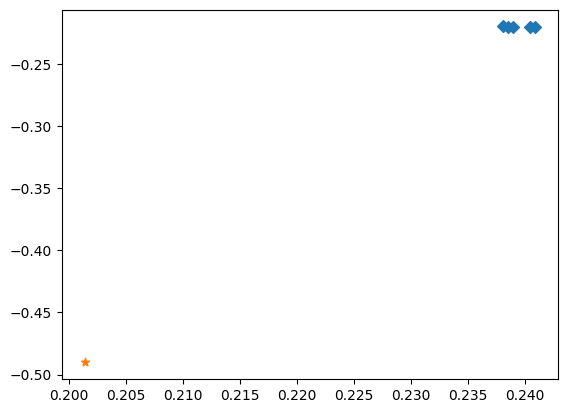

In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, fish_target)
question = [25,150]
question_scaled = (question - mean) / std

kn.predict([question_scaled])
distances, indexes = kn.kneighbors([question_scaled])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.scatter(question_scaled[0], question_scaled[1], marker='*')
plt.show()